<a href="https://colab.research.google.com/github/ishmam8/Stock-Price-Prediction/blob/main/StockPredict(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
from pandas_datareader import data
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock qoute
df = data.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-12-24')
#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591939
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659607
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800158
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933966
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913450
...,...,...,...,...,...,...
2021-12-17,173.470001,169.690002,169.929993,171.139999,195432700.0,171.139999
2021-12-20,170.580002,167.460007,168.279999,169.750000,107499100.0,169.750000
2021-12-21,173.199997,169.119995,171.559998,172.990005,91185900.0,172.990005


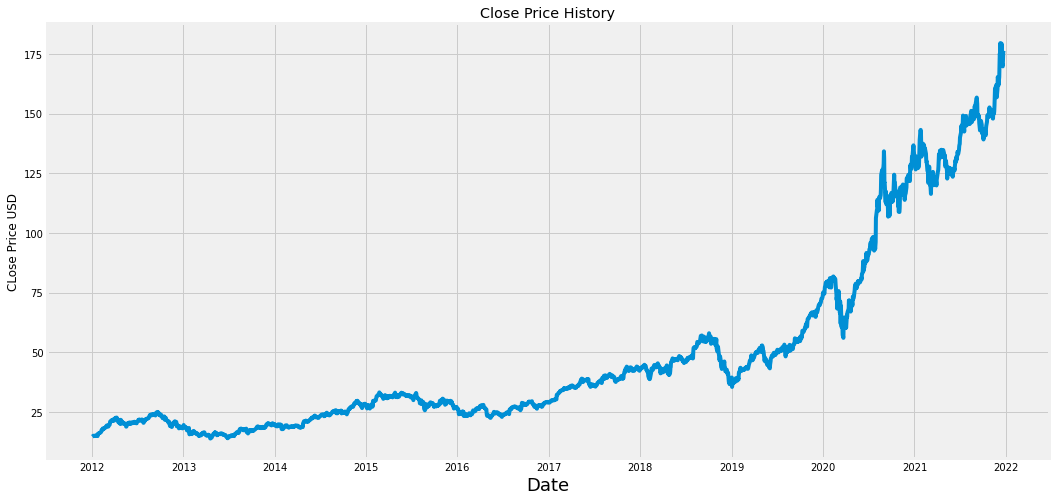

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('CLose Price USD')
plt.show()


In [ ]:
#new df with only close
data = df.filter(['Close'])
#convert the df to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2010

In [ ]:
# train_data = dataset[0:training_data_len,:]
# train_data
# #(2010,1)
# train_data.max()

In [ ]:
#scale the data

# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)

# train_data = scaled_data[0:training_data_len,:]
# test_data = scaled_data[training_data_len-60: ,:]
# print(train_data.max())

#test_data = scaler.transform(test_data)
#scaled_data.shape

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))

train_data = dataset[0:training_data_len,:]
train_data = scaler.fit_transform(train_data)

test_data = dataset[training_data_len-60: ,:]
test_data = scaler.fit_transform(test_data)

In [ ]:
test_data.max()

1.0

In [ ]:
#split
x_train = [] #contains the 60 day price values 
y_train = [] #contains the 61st day price values for the corresponding row

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.01263088, 0.01397939, 0.01678015, 0.01944668, 0.01903785,
       0.01995923, 0.0195382 , 0.01883038, 0.01786628, 0.02085011,
       0.02354104, 0.02271118, 0.01816527, 0.02250372, 0.0182324 ,
       0.03424983, 0.03301116, 0.03462815, 0.03812452, 0.04024186,
       0.04006491, 0.03941202, 0.04219447, 0.04481217, 0.0477777 ,
       0.05256767, 0.06262966, 0.06278221, 0.06838374, 0.07256961,
       0.06537552, 0.06814576, 0.06809085, 0.07585854, 0.07475409,
       0.0767982 , 0.08047154, 0.08251569, 0.088404  , 0.09269359,
       0.09393228, 0.09436553, 0.08703108, 0.08526151, 0.08552391,
       0.09241904, 0.09435943, 0.09852702, 0.10835102, 0.12145786,
       0.1190049 , 0.11901099, 0.12848722, 0.13145275, 0.12934147,
       0.1274133 , 0.12540578, 0.13207511, 0.13665154, 0.13856752])]
[0.13383245710331262]



In [ ]:
#x_train.shape

In [ ]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data for inputting in lstm model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#build the lstm model
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

1950/1950 [==============================] - 54s 26ms/step - loss: 0.0017


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from index 1950 to 2512
# test_data = dataset[training_data_len-60: ,:]
# test_data.shape

In [ ]:
#test_data = scaler.transform(test_data)

x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
y_test.shape

(502, 1)

In [ ]:
#Model predict
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Evaluate the model using root mean squared error (RMSE)
rmse = np.sqrt( np.mean ((predictions - y_test)**2))
rmse

4.299836683200296

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


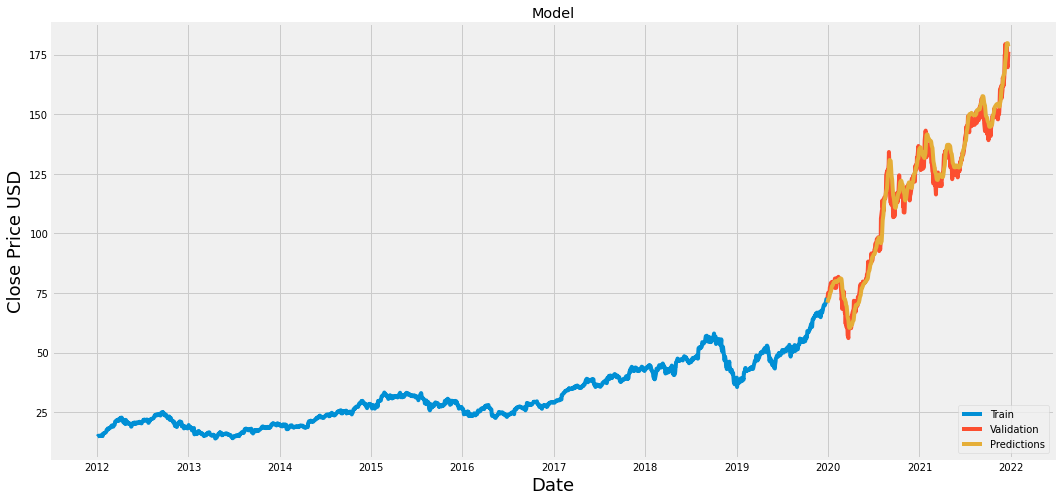

In [ ]:
#plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation', 'Predictions'],loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-12-30,72.879997,70.949944
2019-12-31,73.412498,71.407860
2020-01-02,75.087502,71.878601
2020-01-03,74.357498,72.449486
2020-01-06,74.949997,72.993950
...,...,...
2021-12-17,171.139999,179.837738
2021-12-20,169.750000,179.834213
2021-12-21,172.990005,179.267563
